### "Mashing" two images by generating images from weighted z vectors

In [1]:
from src.data_handling import CIFAR10_data
from src.encoder import AE
from src.net import build_vanila_cifar10_vae as net
import matplotlib.pyplot as plt
import numpy as np

data = CIFAR10_data()
data.load_data('data/cifar10/', keep_classes=[3,5]) # Only the dogs and cats part of the data
autoencoder = AE(net)
autoencoder.restore_model_from_last_checkpoint('./saved_models/vanila_cifar10_dogs_cats/model')
imgs = data.X

INFO:tensorflow:Restoring parameters from ./saved_models/vanila_cifar10_dogs_cats/model


In [2]:
def plot_z_steps(autoencoder, img1, img2):
    z1 = autoencoder.get_z(img1)
    z2 = autoencoder.get_z(img2)
    f = plt.figure(figsize=(10,3))
    plt.subplot(1,9,1)
    plt.imshow(img1.reshape((32,32,3)))
    plt.axis('off')
    for i, alpha in enumerate([0.1,0.25,0.4,0.6,0.75,0.8,1.0]):    
        z3 = z1 * (1-alpha) + z2 * alpha 
        mashed = autoencoder.get_img_from_z(z3)
        plt.subplot(1,9,i+2)
        plt.imshow(np.clip(mashed.reshape((32,32,3)), 0, 1))
        plt.axis('off')
    plt.subplot(1,9,9)
    plt.imshow(img2.reshape((32,32,3)))
    plt.axis('off')
    plt.show()

### Some hand picked samples

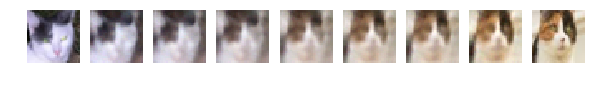

In [3]:
plot_z_steps(autoencoder, imgs[4796], imgs[8259])

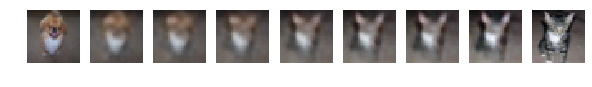

In [4]:
plot_z_steps(autoencoder, imgs[7646], imgs[6526])

### Some randomally selected samples

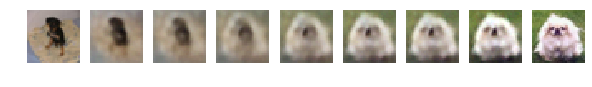

In [11]:
idx1, idx2 = np.random.randint(len(data.X), size=2)
plot_z_steps(autoencoder, imgs[idx1], imgs[idx2])

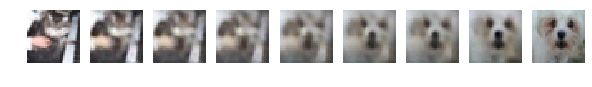

In [19]:
idx1, idx2 = np.random.randint(len(data.X), size=2)
plot_z_steps(autoencoder, imgs[idx1], imgs[idx2])

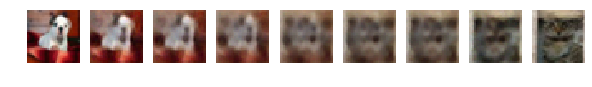

In [25]:
idx1, idx2 = np.random.randint(len(data.X), size=2)
plot_z_steps(autoencoder, imgs[idx1], imgs[idx2])

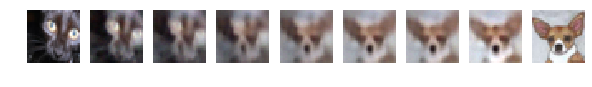

In [29]:
idx1, idx2 = np.random.randint(len(data.X), size=2)
plot_z_steps(autoencoder, imgs[idx1], imgs[idx2])